In [1]:
# изменим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 18,15

# достанем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# возьмем выбранный датафрейм
wine = pd.read_csv('winemag.csv').drop(['Unnamed: 0'], axis=1).dropna()
wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi
62,US,"The aromas are brooding, with notes of barrel ...",Alder Ridge Vineyard,86,25.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ram 2014 Alder Ridge Vineyard Cabernet Franc (...,Cabernet Franc,Ram
64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap
67,US,"A blend of Merlot and Cabernet Franc, this win...",Inspired,86,46.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Basel Cellars 2013 Inspired Red (Columbia Vall...,Bordeaux-style Red Blend,Basel Cellars
71,US,Big oak defines this robustly dense and extrac...,Old Vine,86,40.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Eco Terreno 2013 Old Vine Cabernet Sauvignon (...,Cabernet Sauvignon,Eco Terreno


<BarContainer object of 15 artists>

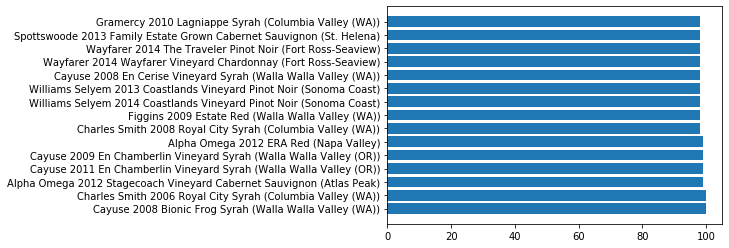

In [12]:
# построим столбчатую диаграмму 15 вин, получивших наибольшее количество очков от сомелье
wine_best15 = wine[['points', 'title']].sort_values(by='points', ascending=False).head(15)
plt.barh(wine_best15['title'], wine_best15['points'])

In [ ]:
'''Очевидно, наши лидеры не так сильно отличаются по оценка друг от друга, как нам бы хотелось. Попробуем немного другой подход и посмотрим распределение оценок при помощи boxplot'''

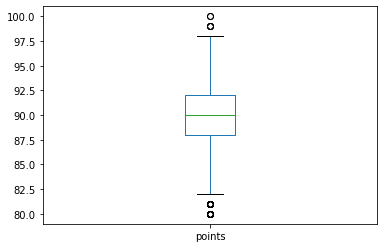

In [14]:
wine['points'].plot(kind='box')

In [ ]:
'''Согласитесь, выглядит намного приятнее, а главное, куда информативнее, чем предыдущий график. Итак, мы видим, что медиана находится на значении 90 с отклонением на 2.5 в обе стороны. Также на данном графике мы видим наличие выбросов на отметках 100, 99, 81 и 80. Посмотрим еще одну метрику - топ-5 винограден по оценкам, выданным произведенному их вину'''

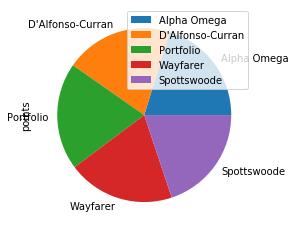

In [19]:
winery_best5 = wine[['points', 'winery']].groupby(['winery']).mean().sort_values(by='points', ascending=False).head(5)
winery_best5.plot(kind='pie', y='points')

In [ ]:
'''Опять-таки, не самый выразительный график, возможно господам винным экспертам не мешало бы для разнообразия ставить оценки пониже или пить вино похуже. Попробуем дать этому датасету еще один шанс и выяснить распределение цены на вина по их видам'''

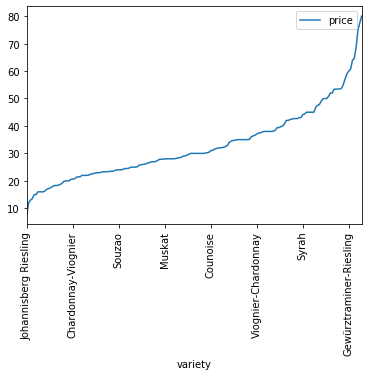

In [81]:
wine_price = wine[['price', 'variety']].groupby(['variety']).mean().sort_values(by='price')
wine_price.plot(rot=90)

In [ ]:
'''Выглядит намного лучше, но все еще не так интересно. Попробуем взглянуть на наличие корелляции между ценой и оценкой'''

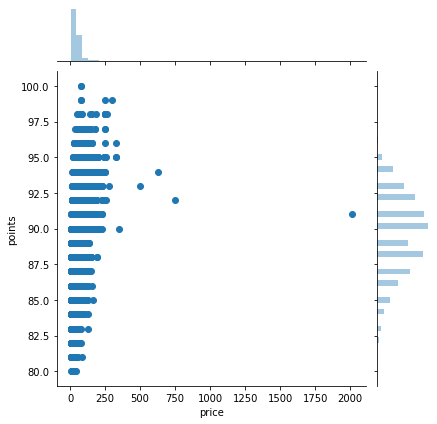

In [86]:
sns.jointplot (x='price', y='points',
data=wine, kind='scatter')

In [ ]:
'''график, конечно, любопытный, но полезная информация, которую мы можем извлечь, это только то, что оценки критиков почти не оказывают влияния на стоимость вина'''